# Modeling for Linear Regression

# Setup

In [ ]:
!pip install python-dotenv google-api-python-client
!git clone https://github.com/vmagdale2/Data-Transformation-Linear-Regression.git

import sys
sys.path.append('/content/Data-Transformation-Linear-Regression/src')
%cd /content/Data-Transformation-Linear-Regression/src
!pwd
!ls

from utils import authenticate_and_load_env, load_data_from_drive
from google.colab import drive
drive.mount('/content/drive')

import os
env_content = """
"""
with open("/content/.env", "w") as f:
    f.write(env_content.strip())


from dotenv import load_dotenv
load_dotenv("/content/.env")


service = authenticate_and_load_env()

file_id = os.getenv("GDRIVE_FILE_ID")
if not file_id:
    raise ValueError("❌ Error: 'GDRIVE_FILE_ID' is missing or invalid in your .env file.")


data = load_data_from_drive(service, file_id)
print("✅ Data loaded successfully!" if data is not None else "❌ Failed to load data.")

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import joblib

df = pd.read_csv('/content/drive/MyDrive/Professional/Portfolio/Transformations/training_data.csv')
df.head()

print("✅ Data loaded successfully!")

X_train = joblib.load('/content/drive/MyDrive/Professional/Portfolio/Transformations/X_train_feature_engineered.pkl')
X_test = joblib.load('/content/drive/MyDrive/Professional/Portfolio/Transformations/X_test_feature_engineered.pkl')


fatal: destination path 'Data-Transformation-Linear-Regression' already exists and is not an empty directory.
/content/Data-Transformation-Linear-Regression/src
/content/Data-Transformation-Linear-Regression/src
data_preprocessing.py		       evaluation.py	       model.py     utils.py
Data-Transformation-Linear-Regression  feature_engineering.py  __pycache__
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive API authenticated successfully!
✅ Data loaded successfully!
✅ Data loaded successfully!


# Baseline Linear Regression Model

In [ ]:
print(X_train.isnull().sum())

CRIM               0
ZN                 0
INDUS              0
CHAS               0
NOX                0
RM                 0
AGE                0
DIS                0
RAD                0
TAX                0
PTRATIO            0
B                  0
LSTAT              0
RM_x_RM            0
LSTAT_x_LSTAT      0
AGE_Bin          150
DIS_Bin          193
CRIM_Bin         237
dtype: int64


In [ ]:
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[['AGE_Bin', 'DIS_Bin', 'CRIM_Bin']] = cat_imputer.fit_transform(X_train[['AGE_Bin', 'DIS_Bin', 'CRIM_Bin']])
X_test[['AGE_Bin', 'DIS_Bin', 'CRIM_Bin']] = cat_imputer.transform(X_test[['AGE_Bin', 'DIS_Bin', 'CRIM_Bin']])

In [ ]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

CRIM             0
ZN               0
INDUS            0
CHAS             0
NOX              0
RM               0
AGE              0
DIS              0
RAD              0
TAX              0
PTRATIO          0
B                0
LSTAT            0
RM_x_RM          0
LSTAT_x_LSTAT    0
AGE_Bin          0
DIS_Bin          0
CRIM_Bin         0
dtype: int64
CRIM             0
ZN               0
INDUS            0
CHAS             0
NOX              0
RM               0
AGE              0
DIS              0
RAD              0
TAX              0
PTRATIO          0
B                0
LSTAT            0
RM_x_RM          0
LSTAT_x_LSTAT    0
AGE_Bin          0
DIS_Bin          0
CRIM_Bin         0
dtype: int64


In [ ]:
joblib.dump(X_train, 'X_train_feature_engineered.pkl')
joblib.dump(X_test, 'X_test_feature_engineered.pkl')
print("✅ Imputation complete and data saved successfully!")

✅ Imputation complete and data saved successfully!


In [ ]:
X_train = pd.get_dummies(X_train, columns=['AGE_Bin', 'DIS_Bin', 'CRIM_Bin'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['AGE_Bin', 'DIS_Bin', 'CRIM_Bin'], drop_first=True)
print("✅ Categorical encoding complete!")

✅ Categorical encoding complete!


In [ ]:
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test.fillna(0, inplace=True)


In [ ]:
joblib.dump(X_train, 'X_train_feature_engineered.pkl')
joblib.dump(X_test, 'X_test_feature_engineered.pkl')
print("✅ Encoded data saved successfully!")

✅ Encoded data saved successfully!


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [ ]:
print(f"Training MSE: {mean_squared_error(y_train, y_train_pred):.4f} | R-squared: {r2_score(y_train, y_train_pred):.4f}")
print(f"Testing MSE: {mean_squared_error(y_test, y_test_pred):.4f} | R-squared: {r2_score(y_test, y_test_pred):.4f}")

Training MSE: 0.1802 | R-squared: 0.8244
Testing MSE: 0.1741 | R-squared: 0.8108


### Notes
No signs of overfitting, strong R^2, small prediction errors.
Model is performing very well.

# Fine Tuning

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)
print(f"Training MSE (Ridge): {mean_squared_error(y_train, y_train_pred_ridge):.4f} | R-squared: {r2_score(y_train, y_train_pred_ridge):.4f}")
print(f"Testing MSE (Ridge): {mean_squared_error(y_test, y_test_pred_ridge):.4f} | R-squared: {r2_score(y_test, y_test_pred_ridge):.4f}")

Training MSE (Ridge): 0.1803 | R-squared: 0.8243
Testing MSE (Ridge): 0.1745 | R-squared: 0.8104


In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)
print(f"Training MSE (Lasso): {mean_squared_error(y_train, y_train_pred_lasso):.4f} | R-squared: {r2_score(y_train, y_train_pred_lasso):.4f}")
print(f"Testing MSE (Lasso): {mean_squared_error(y_test, y_test_pred_lasso):.4f} | R-squared: {r2_score(y_test, y_test_pred_lasso):.4f}")

Training MSE (Lasso): 0.2517 | R-squared: 0.7548
Testing MSE (Lasso): 0.2526 | R-squared: 0.7254


### Notes

Lasso underperformance indicates weak or noisy features.

# Hyperparameter Tuning
## Alpha using GridSearchCV

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_model = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(ridge_model, param_grid, cv=5, scoring='r2')

ridge_cv.fit(X_train, y_train)

best_alpha = ridge_cv.best_params_['alpha']
print(f"✅ Best Alpha Value (Ridge): {best_alpha}")

ridge_optimized = Ridge(alpha=best_alpha)
ridge_optimized.fit(X_train, y_train)

train_mse = mean_squared_error(y_train, ridge_optimized.predict(X_train))
test_mse = mean_squared_error(y_test, ridge_optimized.predict(X_test))

train_r2 = ridge_optimized.score(X_train, y_train)
test_r2 = ridge_optimized.score(X_test, y_test)

print(f"🔍 Training MSE (Ridge): {train_mse:.4f} | R-squared: {train_r2:.4f}")
print(f"🔍 Testing MSE (Ridge): {test_mse:.4f} | R-squared: {test_r2:.4f}")


✅ Best Alpha Value (Ridge): 1
🔍 Training MSE (Ridge): 0.1803 | R-squared: 0.8243
🔍 Testing MSE (Ridge): 0.1745 | R-squared: 0.8104


Will be going with Ridge model.

In [ ]:
joblib.dump(ridge_model, 'final_model.pkl')
print("✅ Final model saved successfully!")

✅ Final model saved successfully!


# Residual Plot

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression

In [ ]:
ridge_model = Ridge(alpha=1).fit(X_train, y_train)
lasso_model = Lasso(alpha=0.1).fit(X_train, y_train)
linear_model = LinearRegression().fit(X_train, y_train)

print("✅ Models loaded successfully!")

✅ Models loaded successfully!


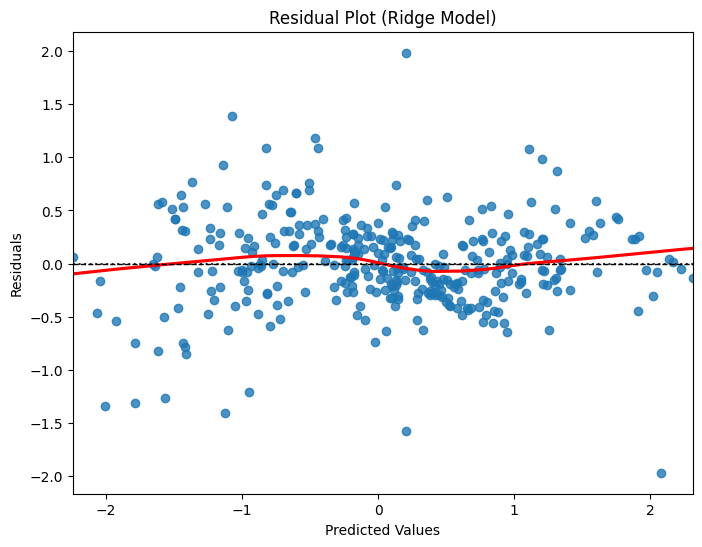

In [ ]:
plt.figure(figsize=(8, 6))
y_pred_train = ridge_model.predict(X_train)
residuals = y_train - y_pred_train
sns.residplot(x=y_pred_train, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot (Ridge Model)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

Shows random spread and red line is close to zero.

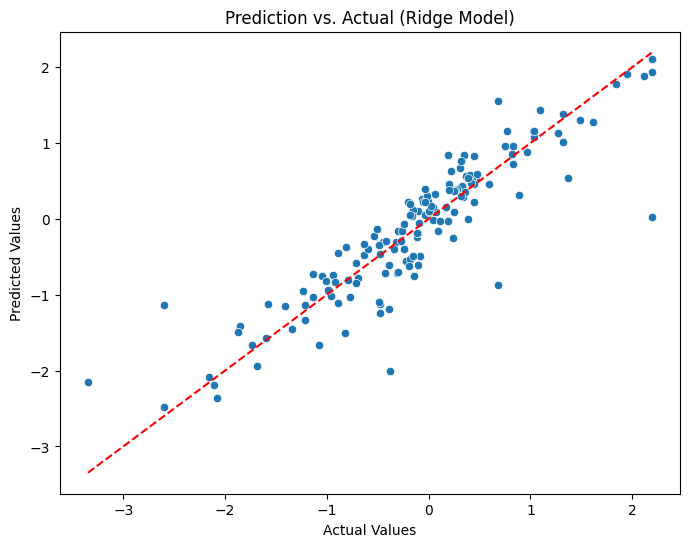

In [ ]:
plt.figure(figsize=(8, 6))
y_pred_test = ridge_model.predict(X_test)
sns.scatterplot(x=y_test, y=y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Prediction vs. Actual (Ridge Model)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

No large deviations.

# Distribution of Errors (Residuals)

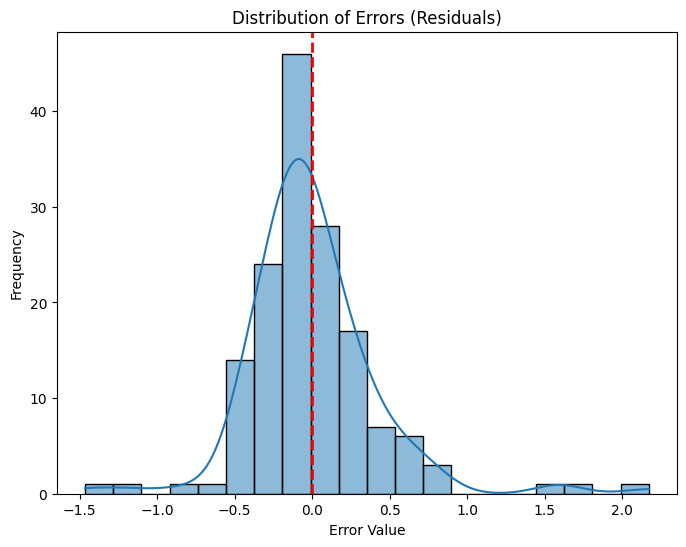

In [ ]:
plt.figure(figsize=(8, 6))
errors = y_test - y_pred_test
sns.histplot(errors, kde=True, bins=20)
plt.title('Distribution of Errors (Residuals)')
plt.xlabel('Error Value')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.show()

No underlying issues as errs are normally distributed with mean very close to zero.

# Coefficient Analysis

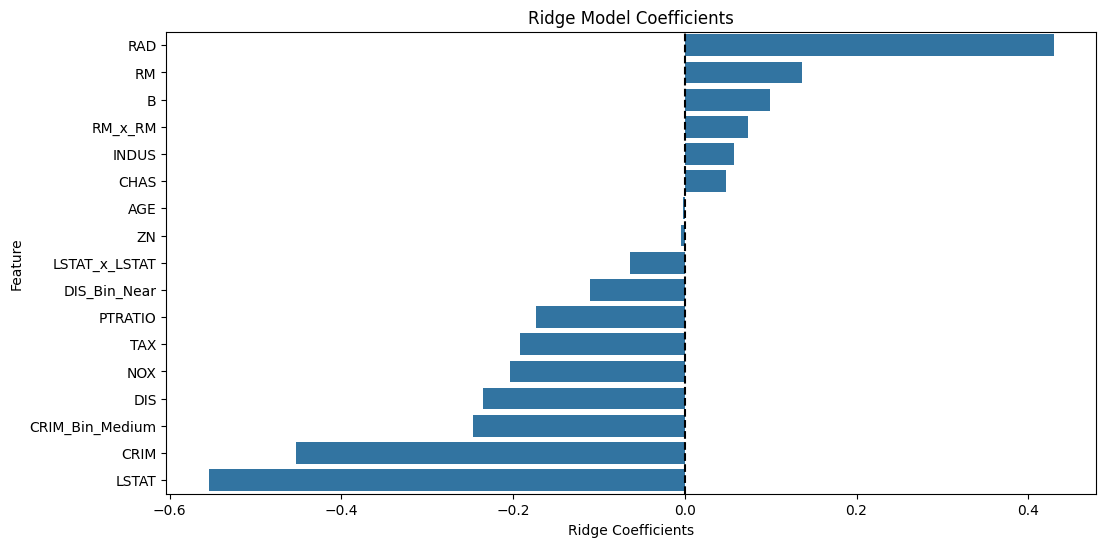

In [ ]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Ridge Coefficients': ridge_model.coef_,
    'Lasso Coefficients': lasso_model.coef_,
    'Linear Regression Coefficients': linear_model.coef_
}).sort_values(by='Ridge Coefficients', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Ridge Coefficients', y='Feature', data=coefficients)
plt.title('Ridge Model Coefficients')
plt.axvline(0, color='black', linestyle='--')
plt.show()

LSTAT, CRIM, RAD are features with strong influence.
AGE, ZN have very minimal impact.